In [94]:
import numpy as np
import pandas as pd

import os, glob, re, scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.models import Model

from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.utils.multiclass import unique_labels

from StanfordCars import *

%matplotlib inline

In [15]:
x_features = pd.read_csv("../Data/features/MobileNetV2.csv")
y_features = pd.read_csv("../Data/cars_agg_label.csv")

In [21]:
x_features

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,0,1.0,0.624495,0.033813,0.908862,0.072910,0.004346,0.000000,1.228820,0.818473,...,0.201633,0.134262,0.000000,0.350688,0.000000,2.198918,0.248370,2.500723,1.304098,0.031497
1,1,2.0,0.000000,0.437930,0.000000,0.032143,0.000000,0.267990,0.064275,0.819570,...,2.181230,0.000000,0.188090,0.962528,0.810423,0.141051,0.000000,0.269119,0.667619,0.307729
2,2,3.0,0.585322,0.001067,0.024649,0.016769,0.174261,0.411321,0.262137,0.000000,...,0.463402,0.870228,0.000000,0.094198,0.195522,0.000000,0.043474,0.046253,0.000000,0.025333
3,3,4.0,0.027754,0.050779,0.164661,0.000325,0.000000,0.042481,0.003805,0.037874,...,0.328400,0.757737,0.000000,0.657076,0.022667,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,5.0,1.143764,0.060055,0.003831,0.000000,0.075050,0.473232,0.380867,1.108273,...,1.719604,1.339719,0.112092,0.576496,0.000000,0.000000,0.000000,0.229518,0.008216,0.735241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180,16180,16181.0,0.612718,0.140077,0.000000,0.000000,0.448265,1.792741,0.000000,0.000000,...,0.006563,0.000000,0.000000,0.649398,0.000000,0.000000,0.046293,0.194650,1.194046,0.037506
16181,16181,16182.0,0.877511,0.422268,0.016902,0.000000,0.039809,0.779360,0.007548,0.000000,...,0.068560,0.167950,0.000000,0.000000,0.000000,0.024853,0.049239,0.375023,0.274020,0.013824
16182,16182,16183.0,0.448333,1.070562,0.150521,0.000000,0.000000,0.017197,0.000000,0.110758,...,0.060986,0.000000,0.000000,0.313205,0.094281,0.218245,0.028336,0.315229,2.260771,0.000000
16183,16183,16184.0,0.030525,2.035002,0.196992,0.023985,0.076134,0.157399,0.000000,0.212373,...,1.538965,0.000000,0.000000,0.943409,0.772161,0.071015,0.350485,0.000000,0.226857,0.000000


In [22]:
y_features

,Unnamed: 0,fileNumber,xmin,ymin,xmax,ymax,class_no,class_label,train_test,subclass,Label1,Label1_No,Label2,Label2_No
0,0,1,112,7,853,717,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
1,1,2,48,24,441,202,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
2,2,3,7,4,277,180,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
3,3,4,33,50,197,150,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
4,4,5,5,8,83,58,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180,16180,16181,38,36,375,234,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
16181,16181,16182,29,34,235,164,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
16182,16182,16183,25,32,587,359,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
16183,16183,16184,56,60,208,186,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    x_features.iloc[:,2:], y_features["Label1_No"], test_size=0.20, random_state=333)

In [24]:
logreg = LogisticRegression(C=100000, verbose=True) # C: Inverse of regularization strength; 
logreg.fit(X_train,y_train)

//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=True,
                   warm_start=False)

In [137]:
from joblib import dump, load
dump(logreg, "../Models/MobileNetV2/LogReg1_Model1.joblib")

['../Models/MobileNetV2/LogReg1_Model1.joblib']

In [59]:
ytest_labels = logreg.predict(X_test)
ytest_prob = logreg.predict_proba(X_test)
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print("Train Score for the Logit Model: {:.3f}".format(train_score))
print("Test Score for the Logit Model: {:.3f}".format(test_score))

Train Score for the Logit Model: 0.885
Test Score for the Logit Model: 0.794


In [62]:
f1_score(y_test, ytest_labels, average="macro")

0.7922515324117011

In [29]:
labels = ["Coupe/Convrtbl", "Sedan", "SUVs/Trucks/Vans"]
print("Confusion matrix: \n\n", confusion_matrix(y_test, ytest_labels))

Confusion matrix: 

 [[833 179  19]
 [194 757 137]
 [ 30 109 979]]


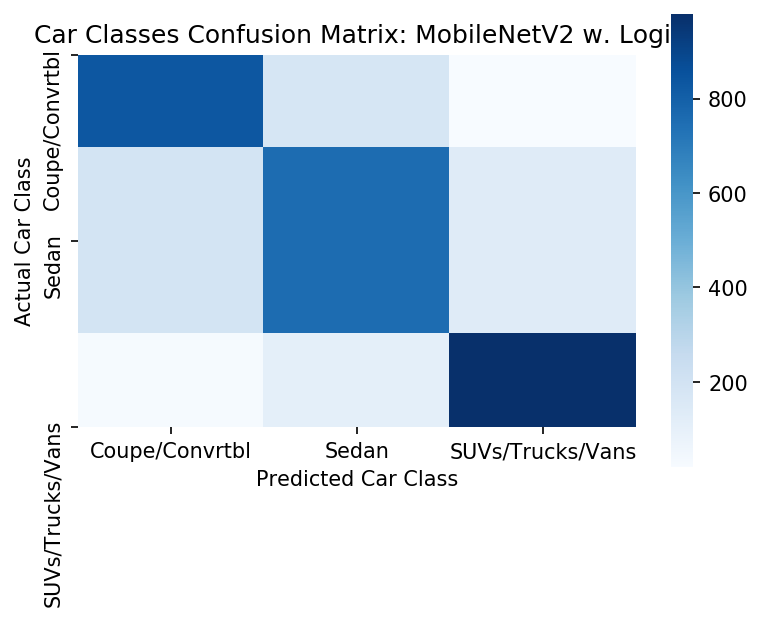

In [31]:
Mobile_confusion = confusion_matrix(y_test, ytest_labels)
plt.figure(dpi=150)
sns.heatmap(Mobile_confusion, cmap=plt.cm.Blues, annot=False, square=True,
           xticklabels=labels,
           yticklabels=labels)

plt.xlabel('Predicted Car Class')
plt.ylabel('Actual Car Class')
plt.title('Car Classes Confusion Matrix: MobileNetV2 w. Logit');

In [41]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[833 179  19]
 [194 757 137]
 [ 30 109 979]]


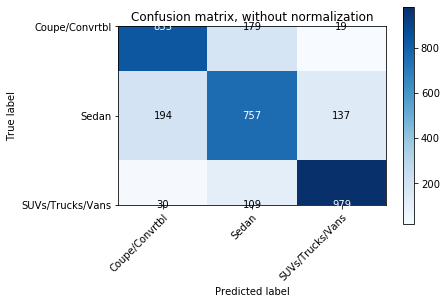

In [40]:
plot_confusion_matrix(y_test, ytest_labels, labels)

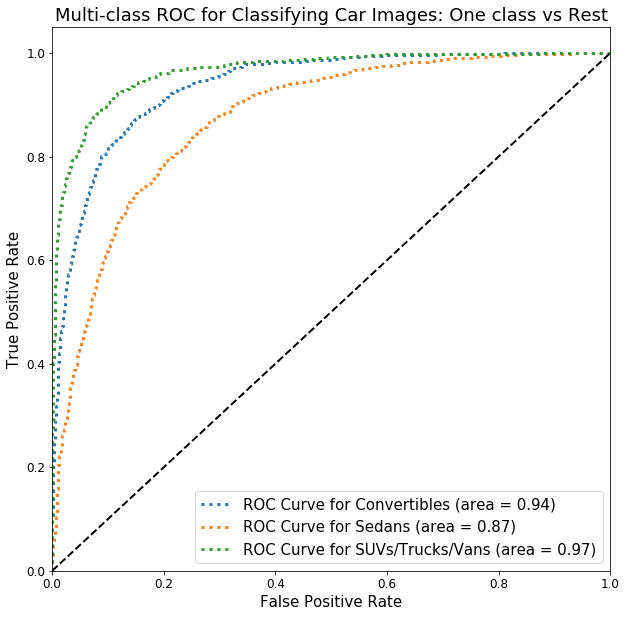

In [131]:
# --- ROC Curves

def create_ROC_Curves(y, ypred, classes=[1,2,3]):
    fpr = dict()
    tpr = dict()
    auc_value = dict()
    
    # --- Binarize the true and preds
    y_true_bin = label_binarize(y, classes)
    #y_pred_bin = label_binarize(ypred, classes)
    #print(y_true_bin.shape)
    
    labels = {
        1: "ROC Curve for Convertibles",
        2: "ROC Curve for Sedans",
        3: "ROC Curve for SUVs/Trucks/Vans"
    }
    
    # --- Get FPR, TPR & AUC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:,i], ypred[:,i])
        #print(len(fpr[i]))
        auc_value[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=labels[i+1]+" (area = {:.2f})".format(auc_value[i]),
                 linestyle = ":", lw=3)
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.legend(loc="lower right", fontsize=15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Multi-class ROC for Classifying Car Images: One class vs Rest", fontsize = 18)
    plt.show()
    
    #return fpr, tpr, auc_value
plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(y_test, ytest_prob)

In [120]:
print(classification_report(y_test, ytest_labels))

              precision    recall  f1-score   support

           1       0.79      0.81      0.80      1031
           2       0.72      0.70      0.71      1088
           3       0.86      0.88      0.87      1118

    accuracy                           0.79      3237
   macro avg       0.79      0.79      0.79      3237
weighted avg       0.79      0.79      0.79      3237



In [141]:
test_logreg = load("../Models/MobileNetV2/LogReg1_Model1.joblib")
ytest_pred2 = test_logreg.predict(X_test)
assert np.all(ytest_pred2 == ytest_labels)
print(type(test_logreg))

<class 'sklearn.linear_model.logistic.LogisticRegression'>


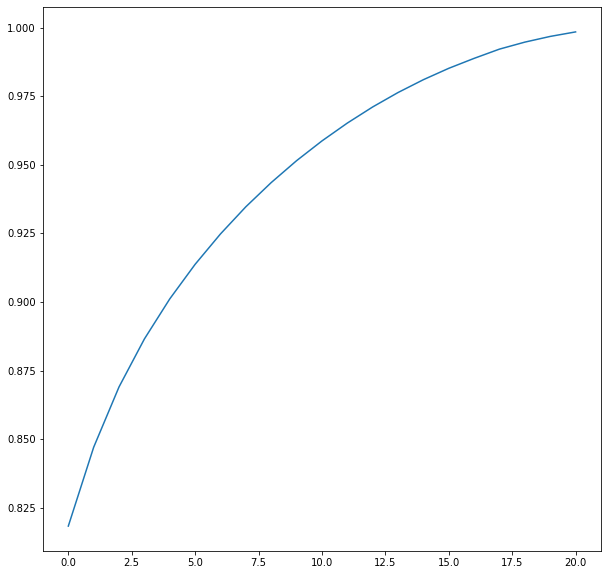

In [151]:
from sklearn.decomposition import PCA

avgScores = []

for M in range(200, 1250, 50):
    testPCA = PCA(n_components=M)
    testPCA.fit(X_train)
    avgScores.append(np.sum(testPCA.explained_variance_ratio_))
    #print(testPCA.score(X_train))

plt.plot(avgScores)